# Determining Q<sup>2</sup> from the scattered electron

In this notebook we determine DIS kinematics parameters from the scattered lepton side. For more details, see the page on the [BNL wiki](https://wiki.bnl.gov/eic/index.php/DIS_Kinematics). The following image gives the summary:
<img src="https://wiki.bnl.gov/eic/upload/Dis.variables.png" width="50%"/>

## Importing uproot

Depending on the versions of uproot and XRootD that you have installed, you may encouter a warning from uproot below. Nevertheless, because of the simple data format of the ATHENA ROOT files, we are able to ignore this warning.

In [14]:
import uproot as ur
import numpy as np
print('Uproot version: ' + ur.__version__)

Uproot version: 4.0.11


## Opening a file with uproot

To test uproot, we will open a sample file (a DIS simulation sample):

In [15]:
server = 'root://sci-xrootd.jlab.org//osgpool/eic/'
file = 'ATHENA/RECO/master/DIS/NC/10x100/minQ2=1/pythia8NCDIS_10x100_minQ2=1_beamEffects_xAngle=-0.025_hiDiv_1.0001.root'

In [16]:
events = ur.open(server + file + ':events', library = 'np')

## Accessing the reconstructed particle momentum

We will access the particle momentum in the `ReconstructedParticles` branch. This contains the reconstructed momentum from the tracking system.

In [40]:
events['ReconstructedParticles'].keys()

['ReconstructedParticles.ID.value',
 'ReconstructedParticles.p.x',
 'ReconstructedParticles.p.y',
 'ReconstructedParticles.p.z',
 'ReconstructedParticles.v.x',
 'ReconstructedParticles.v.y',
 'ReconstructedParticles.v.z',
 'ReconstructedParticles.time',
 'ReconstructedParticles.pid',
 'ReconstructedParticles.status',
 'ReconstructedParticles.charge',
 'ReconstructedParticles.momentum',
 'ReconstructedParticles.energy',
 'ReconstructedParticles.mass',
 'ReconstructedParticles.weight.value']

For this analysis we will only use the momentum `p` and the particle code `pid`. We will select only electrons (`pid == 11`) and combine them with their initial momentum which, in the ATHENA coordinate system, is in the negative $z$ direction.

In [39]:
reconstructed_particles = events['ReconstructedParticles'].arrays()

In [49]:
px, py, pz = reconstructed_particles['ReconstructedParticles.p.x'], reconstructed_particles['ReconstructedParticles.p.y'], reconstructed_particles['ReconstructedParticles.p.z']
pid = reconstructed_particles['ReconstructedParticles.pid']
m = reconstructed_particles['ReconstructedParticles.mass']

The mass of the particle is stored, but completely defined by the `pid` code. For the electron it is indeed always 0.511 MeV.

In [52]:
m[pid==11]

<Array [[0.000511], [0.000511], ... [], []] type='20002 * var * float32'>

In [24]:
E = np.sqrt(E**2-(px**2+py**2+pz**2))

In [38]:
import uproot_methods


ModuleNotFoundError: No module named 'uproot_methods'

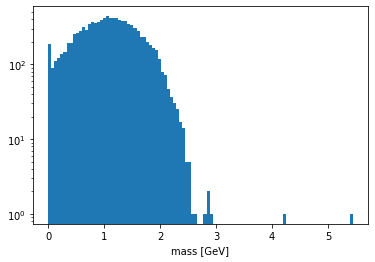

In [37]:
import matplotlib.pyplot as plt
import awkward as ak
plt.hist(ak.flatten(m[pid==11]), bins=100)
plt.yscale('log')
plt.xlabel('mass [GeV]')
plt.show()